<a href="https://colab.research.google.com/github/Jordan-A-G-Henry/Machine-Learning-Projects/blob/main/Jordan_Henry_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pre-Processing:

All data sourced originally from NCBI's Gene Expression Omnibus (GEO). Accession: GSE20181

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi

Excel pre-processing: https://1drv.ms/x/s!ArFWNtcb4PiOlCbLBCVamYzMKkG4?e=Mfa7U5

Samples were filtered in Microsoft Excel, by time, selecting for pre-Treatment and samples taken after 90 days. Samples were then filtered only for tumour responders, in order to try and produce a consistent result. Samples were then sorted by ID, in order to manually comb out any "unpaired" samples. The aim is to have an equal number of pre- and post- treatment samples, and have the samples each be from the same individual. Thus, attempting to capture the gene expression changes resulting from treatment, accounting for variation in the individual gene expression profile.


In [85]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
#SampleNames = pd.read_table('https://georgetown.box.com/s/sfzxm8o2dha8zvbhq7fk4myzlq02vsrr')
SampleNames = pd.read_table('/content/GSE20181 Raw Data (Final)--Sample Names(2).csv',sep=',',header=(0))
SampleNames

,GEO ACESSION,ID,treatment,gender,target,drug,regimen,method,time,response
0,GSM125123,10A,pretreatment,female,breast tumor,NaN,NaN,NaN,NaN,responder
1,GSM506312,10C,NaN,NaN,NaN,Letrozole,2.5mg/day,oral,90 days,responder
2,GSM125127,12A,pretreatment,female,breast tumor,NaN,NaN,NaN,NaN,responder
3,GSM506317,12C,NaN,NaN,NaN,Letrozole,2.5mg/day,oral,90 days,responder
4,GSM125129,13A,pretreatment,female,breast tumor,NaN,NaN,NaN,NaN,responder
...,...,...,...,...,...,...,...,...,...,...
67,GSM506305,69C,NaN,NaN,NaN,Letrozole,2.5mg/day,oral,90 days,responder
68,GSM125233,7A,pretreatment,female,breast tumor,NaN,NaN,NaN,NaN,responder
69,GSM506316,7C,NaN,NaN,NaN,Letrozole,2.5mg/day,oral,90 days,responder
70,GSM125237,9A,pretreatment,female,breast tumor,NaN,NaN,NaN,NaN,responder


From this, we get a list of columns that are to be kept.

In [87]:
Sample_List = []

for i in range (0, len(SampleNames['GEO ACESSION'])):
    Sample_List.append(SampleNames['GEO ACESSION'] [i])

Sample_List

['GSM125123',
 'GSM506312',
 'GSM125127',
 'GSM506317',
 'GSM125129',
 'GSM506307',
 'GSM125131',
 'GSM506308',
 'GSM125133',
 'GSM506318',
 'GSM125137',
 'GSM506313',
 'GSM125139',
 'GSM506314',
 'GSM125141',
 'GSM506315',
 'GSM125143',
 'GSM506320',
 'GSM125145',
 'GSM506309',
 'GSM125147',
 'GSM506321',
 'GSM125149',
 'GSM506310',
 'GSM125153',
 'GSM506322',
 'GSM125157',
 'GSM506325',
 'GSM125159',
 'GSM506272',
 'GSM125161',
 'GSM506267',
 'GSM125165',
 'GSM506274',
 'GSM125169',
 'GSM506276',
 'GSM125179',
 'GSM506280',
 'GSM125181',
 'GSM506281',
 'GSM125183',
 'GSM506282',
 'GSM125189',
 'GSM506286',
 'GSM125193',
 'GSM506288',
 'GSM125197',
 'GSM506289',
 'GSM125201',
 'GSM506290',
 'GSM125203',
 'GSM506291',
 'GSM125209',
 'GSM506294',
 'GSM125213',
 'GSM506296',
 'GSM125215',
 'GSM506297',
 'GSM125219',
 'GSM506270',
 'GSM125221',
 'GSM506299',
 'GSM125223',
 'GSM506300',
 'GSM125225',
 'GSM506301',
 'GSM125231',
 'GSM506305',
 'GSM125233',
 'GSM506316',
 'GSM125237',
 'GSM5

In [183]:
SampleCounts = pd.read_table('/content/GSE20181 Raw Data (Final)--Sample Counts(2).csv',sep=',',header=(0))
SampleCounts

,ID_REF,GSM125123,GSM125124,GSM125125,GSM125126,GSM125127,GSM125128,GSM125129,GSM125130,GSM125131,...,Unnamed: 345,Unnamed: 346,Unnamed: 347,Unnamed: 348,Unnamed: 349,Unnamed: 350,Unnamed: 351,Unnamed: 352,Unnamed: 353,Unnamed: 354
0,1007_s_at,1654.2,386.7,1597.6,1619.0,970.6,1041.0,694.5,588.1,1260.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1053_at,77.6,90.0,84.7,63.3,40.0,24.9,56.1,47.2,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,117_at,113.9,96.0,89.8,74.9,75.6,96.6,57.3,95.1,86.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,121_at,440.8,534.9,374.2,422.8,507.2,374.1,495.7,533.8,548.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1255_g_at,11.3,20.8,14.2,17.8,9.8,21.6,31.9,24.8,55.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,35.1,15.0,9.9,11.4,8.8,33.6,13.5,10.5,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22279,AFFX-ThrX-M_at,6.5,7.6,3.8,4.7,11.4,8.2,5.0,15.4,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22280,AFFX-TrpnX-3_at,5.4,3.2,2.8,5.8,2.7,15.3,2.4,2.6,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22281,AFFX-TrpnX-5_at,22.2,6.4,7.6,8.4,6.0,8.0,8.0,8.8,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With our new list of samples that we want, we can cut out undesireable samples using a bit of backwards logic.

In [ ]:
Not_In_Sample_List = []

for i in range (1, len(SampleCounts.columns)):
    if SampleCounts.columns [i] not in Sample_List:
        Not_In_Sample_List.append(SampleCounts.columns [i])

#Remove 'ID_REF' from the list, of course. We need it. Do so by excluding zero index.

Not_In_Sample_List

In [90]:
SampleCounts = SampleCounts.drop(labels = Not_In_Sample_List, axis = 1)

#And set the index.
SampleCounts.index = SampleCounts['ID_REF']
SampleCounts = SampleCounts.drop(labels = 'ID_REF', axis = 1)

#Also round decimal places to reduce the size of the matrix.
SampleCounts = SampleCounts.round(decimals=1)

#Because Python thinks everything is a string, unless otherwhise stated...
SampleCounts.astype(int)

SampleCounts

,GSM125123,GSM125127,GSM125129,GSM125131,GSM125133,GSM125137,GSM125139,GSM125141,GSM125143,GSM125145,...,GSM506314,GSM506315,GSM506316,GSM506317,GSM506318,GSM506320,GSM506321,GSM506322,GSM506325,GSM506326
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1654.2,970.6,694.5,1260.3,1494.1,1303.4,1381.4,1266.3,568.5,1094.6,...,979.9,588.6,825.5,1314.4,1432.1,708.5,1698.9,1322.3,583.8,1204.7
1053_at,77.6,40.0,56.1,65.0,69.9,73.6,109.5,67.4,104.5,68.2,...,62.2,44.8,60.4,48.6,26.3,72.0,78.4,58.7,79.2,55.8
117_at,113.9,75.6,57.3,86.6,106.6,84.1,76.4,76.0,75.7,59.1,...,67.4,131.1,56.8,94.6,68.6,72.1,84.3,61.4,76.1,94.8
121_at,440.8,507.2,495.7,548.4,532.7,365.9,369.6,516.4,375.4,356.8,...,340.2,412.3,483.7,401.0,544.3,352.5,621.6,538.9,304.3,558.9
1255_g_at,11.3,9.8,31.9,55.9,24.6,4.6,25.2,15.5,16.8,14.3,...,13.3,60.5,29.8,11.4,44.1,31.0,34.8,21.5,9.9,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,35.1,8.8,13.5,8.1,7.7,6.0,26.4,14.3,7.4,19.6,...,5.6,43.9,17.1,16.1,9.8,6.0,14.7,11.0,7.0,36.4
AFFX-ThrX-M_at,6.5,11.4,5.0,4.1,5.5,5.7,9.9,14.3,3.2,5.5,...,12.8,6.9,4.4,30.6,29.0,16.1,11.9,2.2,2.9,15.6
AFFX-TrpnX-3_at,5.4,2.7,2.4,3.0,3.8,1.3,5.9,7.0,9.7,1.9,...,2.4,12.2,1.7,9.2,3.9,5.4,1.1,1.7,0.9,2.1


Finally, the data must be organized in terms of treatment and control, in order to simplify the process of training the Random-Forest Classifier. The simplest way to do this seems to be to create two separate dataframes, and merge them. Fortunately, the original sample list is already in paired order.

In [91]:
#Pre_Treatment = Sample_List
Pre_Treatment = []

for i in range(0,len(Sample_List)):
    if (i % 2) == 0:
        Pre_Treatment.append(Sample_List[i])

Post_Treatment = []

for i in range(0,len(Sample_List)):
    if (i % 2) == 1:
        Post_Treatment.append(Sample_List[i])

#Pre_Treatment
#Post_Treatment

In [92]:
Pre_Treatment_Samples = SampleCounts
Pre_Treatment_Samples = Pre_Treatment_Samples.drop(labels = Post_Treatment, axis = 1)
Pre_Treatment_Samples

,GSM125123,GSM125127,GSM125129,GSM125131,GSM125133,GSM125137,GSM125139,GSM125141,GSM125143,GSM125145,...,GSM125209,GSM125213,GSM125215,GSM125219,GSM125221,GSM125223,GSM125225,GSM125231,GSM125233,GSM125237
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1654.2,970.6,694.5,1260.3,1494.1,1303.4,1381.4,1266.3,568.5,1094.6,...,1077.4,1043.0,1608.4,1307.9,1370.7,1834.3,1998.7,1272.8,1099.4,1279.9
1053_at,77.6,40.0,56.1,65.0,69.9,73.6,109.5,67.4,104.5,68.2,...,77.6,65.5,41.5,42.5,107.9,14.9,20.2,100.3,60.4,95.1
117_at,113.9,75.6,57.3,86.6,106.6,84.1,76.4,76.0,75.7,59.1,...,90.8,114.7,129.1,89.3,78.4,197.3,114.7,96.4,60.0,82.7
121_at,440.8,507.2,495.7,548.4,532.7,365.9,369.6,516.4,375.4,356.8,...,697.2,989.0,1020.5,686.2,492.7,1403.0,952.5,475.7,431.5,535.8
1255_g_at,11.3,9.8,31.9,55.9,24.6,4.6,25.2,15.5,16.8,14.3,...,11.9,31.5,51.0,30.7,35.1,83.0,43.2,27.7,10.0,27.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,35.1,8.8,13.5,8.1,7.7,6.0,26.4,14.3,7.4,19.6,...,43.0,30.7,41.6,8.9,22.0,83.9,45.1,32.2,5.0,15.4
AFFX-ThrX-M_at,6.5,11.4,5.0,4.1,5.5,5.7,9.9,14.3,3.2,5.5,...,6.1,7.2,34.5,29.6,8.3,25.4,9.0,4.8,3.4,21.0
AFFX-TrpnX-3_at,5.4,2.7,2.4,3.0,3.8,1.3,5.9,7.0,9.7,1.9,...,5.2,11.8,7.3,19.8,8.3,9.9,2.6,1.9,2.6,2.3


In [93]:
Post_Treatment_Samples = SampleCounts
Post_Treatment_Samples = Post_Treatment_Samples.drop(labels = Pre_Treatment, axis = 1)
Post_Treatment_Samples

,GSM506267,GSM506270,GSM506272,GSM506274,GSM506276,GSM506280,GSM506281,GSM506282,GSM506286,GSM506288,...,GSM506314,GSM506315,GSM506316,GSM506317,GSM506318,GSM506320,GSM506321,GSM506322,GSM506325,GSM506326
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1299.0,1209.4,739.8,1733.4,1612.7,760.8,996.4,959.5,814.8,722.3,...,979.9,588.6,825.5,1314.4,1432.1,708.5,1698.9,1322.3,583.8,1204.7
1053_at,69.2,66.9,34.0,50.2,56.7,44.9,69.2,59.8,49.3,66.3,...,62.2,44.8,60.4,48.6,26.3,72.0,78.4,58.7,79.2,55.8
117_at,86.7,104.1,138.0,86.8,133.9,120.3,131.3,117.3,83.2,130.6,...,67.4,131.1,56.8,94.6,68.6,72.1,84.3,61.4,76.1,94.8
121_at,514.4,784.6,769.8,713.1,707.3,726.8,709.1,705.4,735.8,702.0,...,340.2,412.3,483.7,401.0,544.3,352.5,621.6,538.9,304.3,558.9
1255_g_at,7.5,14.8,69.8,27.5,60.1,42.8,41.1,28.3,50.0,43.2,...,13.3,60.5,29.8,11.4,44.1,31.0,34.8,21.5,9.9,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,4.0,27.5,26.8,39.3,16.6,21.0,16.2,38.0,42.5,13.9,...,5.6,43.9,17.1,16.1,9.8,6.0,14.7,11.0,7.0,36.4
AFFX-ThrX-M_at,9.7,19.8,4.1,13.1,12.4,15.0,22.9,8.0,18.0,7.9,...,12.8,6.9,4.4,30.6,29.0,16.1,11.9,2.2,2.9,15.6
AFFX-TrpnX-3_at,3.1,7.4,12.5,2.9,2.8,1.0,2.3,5.2,4.7,5.0,...,2.4,12.2,1.7,9.2,3.9,5.4,1.1,1.7,0.9,2.1


In [94]:
#SampleCounts_Sorted = Pre_Treatment_Samples + Post_Treatment_Samples
SampleCounts_Sorted = pd.concat([Pre_Treatment_Samples, Post_Treatment_Samples], axis = 1)
SampleCounts_Sorted

,GSM125123,GSM125127,GSM125129,GSM125131,GSM125133,GSM125137,GSM125139,GSM125141,GSM125143,GSM125145,...,GSM506314,GSM506315,GSM506316,GSM506317,GSM506318,GSM506320,GSM506321,GSM506322,GSM506325,GSM506326
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1654.2,970.6,694.5,1260.3,1494.1,1303.4,1381.4,1266.3,568.5,1094.6,...,979.9,588.6,825.5,1314.4,1432.1,708.5,1698.9,1322.3,583.8,1204.7
1053_at,77.6,40.0,56.1,65.0,69.9,73.6,109.5,67.4,104.5,68.2,...,62.2,44.8,60.4,48.6,26.3,72.0,78.4,58.7,79.2,55.8
117_at,113.9,75.6,57.3,86.6,106.6,84.1,76.4,76.0,75.7,59.1,...,67.4,131.1,56.8,94.6,68.6,72.1,84.3,61.4,76.1,94.8
121_at,440.8,507.2,495.7,548.4,532.7,365.9,369.6,516.4,375.4,356.8,...,340.2,412.3,483.7,401.0,544.3,352.5,621.6,538.9,304.3,558.9
1255_g_at,11.3,9.8,31.9,55.9,24.6,4.6,25.2,15.5,16.8,14.3,...,13.3,60.5,29.8,11.4,44.1,31.0,34.8,21.5,9.9,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,35.1,8.8,13.5,8.1,7.7,6.0,26.4,14.3,7.4,19.6,...,5.6,43.9,17.1,16.1,9.8,6.0,14.7,11.0,7.0,36.4
AFFX-ThrX-M_at,6.5,11.4,5.0,4.1,5.5,5.7,9.9,14.3,3.2,5.5,...,12.8,6.9,4.4,30.6,29.0,16.1,11.9,2.2,2.9,15.6
AFFX-TrpnX-3_at,5.4,2.7,2.4,3.0,3.8,1.3,5.9,7.0,9.7,1.9,...,2.4,12.2,1.7,9.2,3.9,5.4,1.1,1.7,0.9,2.1


Idea: Conduct also a 2-sample T-test, to look for significant differences in expression. Perhaps redundant, perhaps not.

I. RandomForest Classifier

Aim is to train a random forest classifier to detect the difference between a patient before and after chemotherapy, based solely on gene expression data. Then to look at the GINI value generated for each gene as a measure of its predictive significance. This seems more complex than just running two-sample t-tests for each gene, for no additional benefit, but the point of using such a model is to try and improve it afterwards via pre-selection of genes known to relate to a particular clinically relevant condition. Such a model would hopefully be a first step in the direction of a simple model to predict which patients are likely to experience a particular side-effect of chemotherapy (eg. Chemotherapy-Induced Cognitive Decline).

In [95]:
features = SampleCounts_Sorted.index
features

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Hs28SrRNA-5_at', 'AFFX-r2-Hs28SrRNA-M_at',
       'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at',
       'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'],
      dtype='object', name='ID_REF', length=22283)

Labels need not be stored with the actually data, and would need to be removed anyway. Hence, will create the labels list here.

In [ ]:
Label_Row = []
for i in range (0,36):
    Label_Row.append('Pre-Treatment')
for i in range (0,36):
    Label_Row.append('Post-Treatment')
#Label_Row = pd.DataFrame(Label_Row)    *
#Label_Row = Label_Row.transpose()      *
Label_Row

In [97]:
#"id" column has already been made into the index, and so it shouldn't be an issue.
SampleCounts_Sorted_T = np.transpose(SampleCounts_Sorted)

X = SampleCounts_Sorted_T.iloc[:, ].values
y = Label_Row

#save class names
classes = np.unique(y)
n_classes = len(classes)

str(classes)

"['Post-Treatment' 'Pre-Treatment']"

In [98]:
SampleCounts_Sorted_T

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM125123,1654.2,77.6,113.9,440.8,11.3,233.3,119.5,8.3,394.8,14.8,...,481.9,523.3,17525.1,12928.9,6.4,35.1,6.5,5.4,22.2,7.8
GSM125127,970.6,40.0,75.6,507.2,9.8,177.7,105.1,7.8,106.8,41.7,...,3114.7,1934.4,18091.1,11943.8,6.7,8.8,11.4,2.7,6.0,8.1
GSM125129,694.5,56.1,57.3,495.7,31.9,184.1,98.7,9.5,227.8,23.2,...,196.9,408.7,20322.1,14770.1,3.9,13.5,5.0,2.4,8.0,3.4
GSM125131,1260.3,65.0,86.6,548.4,55.9,248.8,114.5,7.7,147.8,26.2,...,283.4,557.0,22789.4,16449.3,6.3,8.1,4.1,3.0,16.0,3.7
GSM125133,1494.1,69.9,106.6,532.7,24.6,251.1,83.9,6.2,18.9,28.1,...,184.2,302.4,15293.8,10298.8,14.1,7.7,5.5,3.8,17.4,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM506320,708.5,72.0,72.1,352.5,31.0,129.9,95.8,7.4,291.1,25.3,...,261.3,556.9,11669.6,9433.9,3.7,6.0,16.1,5.4,4.2,3.0
GSM506321,1698.9,78.4,84.3,621.6,34.8,114.2,60.8,4.9,4.5,29.2,...,361.2,445.6,13807.3,10234.8,2.9,14.7,11.9,1.1,5.8,2.5
GSM506322,1322.3,58.7,61.4,538.9,21.5,120.7,71.7,4.4,23.2,30.6,...,201.0,355.9,20615.4,15271.1,5.1,11.0,2.2,1.7,4.9,3.1
GSM506325,583.8,79.2,76.1,304.3,9.9,244.3,62.2,6.2,155.4,24.4,...,410.9,438.5,12516.0,10363.4,4.2,7.0,2.9,0.9,2.4,1.2


In [99]:
X

array([[1.6542e+03, 7.7600e+01, 1.1390e+02, ..., 5.4000e+00, 2.2200e+01,
        7.8000e+00],
       [9.7060e+02, 4.0000e+01, 7.5600e+01, ..., 2.7000e+00, 6.0000e+00,
        8.1000e+00],
       [6.9450e+02, 5.6100e+01, 5.7300e+01, ..., 2.4000e+00, 8.0000e+00,
        3.4000e+00],
       ...,
       [1.3223e+03, 5.8700e+01, 6.1400e+01, ..., 1.7000e+00, 4.9000e+00,
        3.1000e+00],
       [5.8380e+02, 7.9200e+01, 7.6100e+01, ..., 9.0000e-01, 2.4000e+00,
        1.2000e+00],
       [1.2047e+03, 5.5800e+01, 9.4800e+01, ..., 2.1000e+00, 2.9100e+01,
        4.8000e+00]])

In [100]:
len(X)

72

In [ ]:
y

In [102]:
len(y)

72

In [103]:
#Construction of training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Finally, we can create the actually Random Forest model! 
A standard Random Forest model, with nothing special about it.

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False)

#fit model on training data
model.fit(X_train, y_train)

#estimator = model.estimators_[10]

#Predict test data
predictions = model.predict(X_test)
print("Model accuracy = ", round(accuracy_score(y_test, predictions),2))

Model accuracy =  0.68


Surprisingly good accuracy. I was expecting something around 50%.

In [105]:
#Measure prediction accuracy vs split, for evidence of overfitting.
test_model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False)
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i*0.1), random_state=0)
    test_model.fit(X_train, y_train)
    predictions = test_model.predict(X_test)
    print("Test Size", (i*0.1),"Model accuracy = ", round(accuracy_score(y_test, predictions),2))

Test Size 0.1 Model accuracy =  0.88
Test Size 0.2 Model accuracy =  0.8
Test Size 0.30000000000000004 Model accuracy =  0.73
Test Size 0.4 Model accuracy =  0.86
Test Size 0.5 Model accuracy =  0.81
Test Size 0.6000000000000001 Model accuracy =  0.8
Test Size 0.7000000000000001 Model accuracy =  0.49
Test Size 0.8 Model accuracy =  0.48
Test Size 0.9 Model accuracy =  0.48


It's interesting to note here that the original model was actually in a"local minimum" of sorts regarding prediction accuracy. Hence why it's good to check. Haviing run this analysis multiple times, the effect is not a fluke, but shows up consistently. To avoid risk of overfitting to the training set, I select the point at which accuracy begins to level off: At 40%.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Model accuracy = ", round(accuracy_score(y_test, predictions),2))

Model accuracy =  0.83


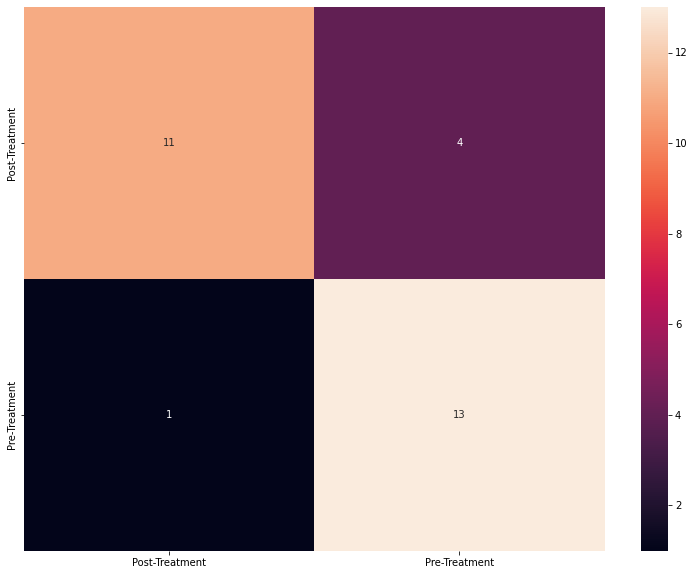

In [107]:
conf = confusion_matrix(y_test,predictions)
new_conf = pd.DataFrame(conf, columns=classes, index=classes)

import matplotlib.pyplot as plt
import seaborn as sns

#plot heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(new_conf, annot=True);

Again, not bad.

Feature Importance:

The initial purpose of training this model was to look at the feature importance given for each gene. (Note that the gene names given are actually Affymetrix probe ID's, and so must be converted.) it's traditional to take the top genes, by feature importance, and display them.

In [108]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)

forest_importances_ranked = forest_importances.sort_values()
#Turn it into a dataframe to be able to search.
forest_importances_ranked = pd.DataFrame(forest_importances_ranked)
#Add a "ranking" column.
rank = []
for i in range(0,len(forest_importances_ranked)):
    rank.append(i)
forest_importances_ranked['rank'] = rank

forest_importances_ranked.tail(20)

,0,rank
ID_REF,,
204018_x_at,0.002777,22263
204170_s_at,0.002805,22264
202177_at,0.003019,22265
218163_at,0.003045,22266
219454_at,0.003140,22267
202035_s_at,0.003299,22268
209840_s_at,0.003353,22269
209466_x_at,0.003581,22270
201983_s_at,0.003661,22271


In [123]:
top_probes = forest_importances_ranked.tail(20)
top_probes.index

Index(['204018_x_at', '204170_s_at', '202177_at', '218163_at', '219454_at',
       '202035_s_at', '209840_s_at', '209466_x_at', '201983_s_at',
       '211737_x_at', '219779_at', '209747_at', '219148_at', '221911_at',
       '213226_at', '215227_x_at', '204051_s_at', '217232_x_at', '213993_at',
       '221541_at'],
      dtype='object', name='ID_REF')

These are the top genes(probes, rather) of interest.

In [120]:
#Now to define a quick function that gives me the ranking of a gene if I ask for it, as %-ile.
def feature_percentile(Query):
    forest_importances_ranked.loc[forest_importances_ranked.index == Query]

    result = forest_importances_ranked.loc[forest_importances_ranked.index == Query]

    result_list = result.values
    result_list = result_list.tolist()
    #For whatever reason, it comes out as a list within a list....
    result_list = result_list[0]
    #Now the actual ranking...
    ranking = result_list[1]
    #And finally....
    percentile = (ranking/len(forest_importances_ranked))*100

    #I'm noticing that the feature importance is zero, for a lot of the lower order ones.
    #Hence, the ranking doesn't really make sense there. To guard against this.
    if result_list[0] != 0:
        Importance_NonZero = 'True'
    else:
        Importance_NonZero = 'False'

    return ('Feature Percentile:', percentile,'Importance Non-Zero:', Importance_NonZero)

#test
print(feature_percentile('204170_s_at'))


('Feature Percentile:', 99.91473320468519, 'Importance Non-Zero:', 'True')


Now to attempted to refine the model with a focus on neurodegeneneration:

The GEO Accession is: GSE20181. The platform is given as 'GPL96	[HG-U133A] Affymetrix Human Genome U133A Array'. This is very important to get right, given that the probe mappings are subject to change. On advice from instructor, I used: https://david.ncifcrf.gov/conversion.jsp

Results:

In [121]:
Top_Results = pd.read_table('https://david.ncifcrf.gov/data/download/list_157DCFBF830E1670863705984.txt')
Top_Results

,AFFYMETRIX_3PRIME_IVT_ID,Name,Species
0,219148_at,PDZ binding kinase(PBK),Homo sapiens
1,219779_at,zinc finger homeobox 4(ZFHX4),Homo sapiens
2,209747_at,transforming growth factor beta 3(TGFB3),Homo sapiens
3,217232_x_at,hemoglobin subunit beta(HBB),Homo sapiens
4,221911_at,ETS variant transcription factor 1(ETV1),Homo sapiens
5,211737_x_at,pleiotrophin(PTN),Homo sapiens
6,209466_x_at,pleiotrophin(PTN),Homo sapiens
7,201983_s_at,epidermal growth factor receptor(EGFR),Homo sapiens
8,221541_at,cysteine rich secretory protein LCCL domain co...,Homo sapiens
9,204170_s_at,CDC28 protein kinase regulatory subunit 2(CKS2),Homo sapiens


I then ran a literature cursory review of each gene, to see if there existed literature linking it to either CICI or Neurodegeneration:


0. PBK:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6725850/

https://www.mdpi.com/2073-4409/10/2/371/htm 
‘Activated PBK/TOPK conferred neuroprotection against focal cerebral ischemia/reperfusion injury by its antioxidative effects, in part through activation of the extracellular signal-regulated kinase pathway [57].’ (cite)

2. TGFB3:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5846707/

4. ETV1 

https://chemh.stanford.edu/training-education/undergraduate-programs/undergraduate-scholars-program/2018-research-projects

5. PTN

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3925022/

7. EGFR

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7464966/

10. SPON1

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7290723/

11. LRRN3

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6728017/

14. EGFL6

Not implicated in neurodegeneration, but certainly implicated in tumour progression. So, not inculding it would probably reduce model performance.

17. CCNA2

https://pubmed.ncbi.nlm.nih.gov/30540563/

18. GAS6

https://jneuroinflammation.biomedcentral.com/articles/10.1186/s12974-022-02397-y

Comment: I'm very much surprised by how many of these genes are implicated either directly or indirectly in various neuro-degenerative disorders. This alone provides evidence to the assertion that chemotherapeutic agents can induce neurodegeneration, and that these changes can be evidenced in a fairly precise, non-invasive way. Most encouragingly, much of the above literature gives evidence of these genes being the targets of drugs intended to limit or reverse damage. So, there exist the tool for non-invasive diagnosis, and potential treatment of Chemotherapy induced Neurodegeneration.

In [133]:
#Probes from the list that are of interest to us.
Interest_ID_REF = []
Num_List = [0,2,4,5,7,10,11,14,17,18]
for i in Num_List:
    Interest_ID_REF.append(Top_Results.values[i,0])
Interest_ID_REF

['219148_at',
 '209747_at',
 '221911_at',
 '211737_x_at',
 '201983_s_at',
 '213993_at',
 '209840_s_at',
 '219454_at',
 '213226_at',
 '202177_at']

I also selected a number of studies which looked at gene expression difference resulting directly from the application of chemotherapeutic agents directly to iPSC neurons, in culture. I did this in order to try and adentify changes in transcription unique to neurons as part of the overall response to chemotherapeutic agents (hopefully detectable in the blood), and so useful as an indicator of the specific effect of the drug on those cells. Given how many targets of interest we already have to work with, it should be permission to start with a few from this list, and later modify the code to include more.

A. https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE173610

Targets:

1. ATF3 (Gene ID: 467)
- Marker of neuronal injury.
2. SESN2 (Gene ID: 83667)
- Marker of stress.
3. CASP3 (Gene ID: 836)
4. ADM (Gene ID: 133)

Again utilizing the conversion program: https://david.ncifcrf.gov/conversion.jsp
Unfortunately, the program refused to run more than one gene. Also, a large number of probes can map to the same gene, thus, complicating everything.

Finally, the program appeared to malfunction, and refused to show me probes for any other gene except ATF3. So, this is what I have to work with, so far.

In [135]:
_467_Results = pd.read_table('https://david.ncifcrf.gov/data/download/conv_2058D6FA39D01670870853854.txt')
_467_Results

,From,To,Species,Gene Name
0,467,287_at,Homo sapiens,activating transcription factor 3(ATF3)
1,467,11719342_a_at,Homo sapiens,activating transcription factor 3(ATF3)
2,467,ADXECEMUTR.1155_s_at,Homo sapiens,activating transcription factor 3(ATF3)
3,467,11753632_x_at,Homo sapiens,activating transcription factor 3(ATF3)
4,467,Hs2.460.3.A1_3p_at,Homo sapiens,activating transcription factor 3(ATF3)
5,467,1554420_at,Homo sapiens,activating transcription factor 3(ATF3)
6,467,88853_at,Homo sapiens,activating transcription factor 3(ATF3)
7,467,ADXECAD.1092_s_at,Homo sapiens,activating transcription factor 3(ATF3)
8,467,202672_PM_s_at,Homo sapiens,activating transcription factor 3(ATF3)
9,467,1554420_PM_at,Homo sapiens,activating transcription factor 3(ATF3)


In [ ]:
Probe_List = []
for i in range(0, len(_467_Results)):
    Probe_List.append(_467_Results.values[i,1])
Probe_List

Now, fed into the function we wrote to assess feature importance. What I've found is that if the probe isn't part of the array (and it seems intuitive that most of these probes won't be), it produces an IndexError. Must trap in order to iterate.

In [145]:
for i in range(0,len(Probe_List)):
    try:
        feature_percentile(Probe_List[i])
    except IndexError:
        print ('Probe not found in array.')

Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.
Probe not found in array.


Dissappointing. Hopefully more probe Ids can be found in the future, through additional literature searching, to be fed into the pipeline. For now, there are enough features to work with. More features would likely improve the accuracy of the resulting model, but are not essential.

**Feature Selection**

The aim of this final section of the analysis is to determine whether the features we've identified as being linked to Neurodegeneration can be used to successfuly distinguish between pre- and post- treatment samples. To do so, intended course is to create a smaller dataset, with only the selected features, and run the same RandomForest model on it, looking for differences in predictive accuracy.

The rationale behind this is to prove that this set of gene expression changes occurs consistently enough in chemotherapy recipients that it can be assumed to be a part of the expected effect of the drug.

I had expected to have more features in this list which were selected from literature, rather than the data itself (which is a bit circular), but this is amenable to further work.

In [168]:
Interest = []
for i in SSC.index:
    if i in Interest_ID_REF:
        Interest.append('Yes')
    else:
        Interest.append('No')
#Create an 'interest' column.
SSC['Interest'] = Interest

#Now, drop everything not interesting.
SSC = SSC[SSC.Interest == 'Yes']
SSC

,GSM125123,GSM125127,GSM125129,GSM125131,GSM125133,GSM125137,GSM125139,GSM125141,GSM125143,GSM125145,...,GSM506315,GSM506316,GSM506317,GSM506318,GSM506320,GSM506321,GSM506322,GSM506325,GSM506326,Interest
ID_REF,,,,,,,,,,,,,,,,,,,,,
201983_s_at,79.2,196.7,111.2,68.8,57.4,24.2,97.0,59.6,60.4,245.1,...,167.0,217.6,93.8,301.4,227.8,58.9,159.1,195.1,231.2,Yes
202177_at,100.9,154.2,201.0,182.4,201.9,105.8,196.3,151.3,108.4,130.1,...,601.1,288.4,263.3,173.0,435.9,84.9,235.7,721.2,323.7,Yes
209747_at,267.1,196.5,192.8,300.0,312.6,160.6,306.0,328.6,374.7,650.9,...,701.4,324.3,317.1,363.3,417.8,431.9,801.3,550.2,295.7,Yes
209840_s_at,58.1,190.7,54.9,20.2,95.6,30.8,42.3,6.8,86.4,102.3,...,102.5,106.4,50.3,182.3,100.9,25.7,133.7,130.7,73.1,Yes
211737_x_at,326.9,421.3,889.9,430.5,205.6,156.4,181.5,89.6,95.7,350.6,...,793.4,655.9,404.0,2491.6,2717.6,71.7,665.1,1597.3,175.9,Yes
213226_at,114.7,117.5,135.7,146.3,149.7,97.3,104.2,110.7,149.2,112.8,...,76.6,76.9,66.7,85.8,78.7,147.2,70.7,59.8,45.5,Yes
213993_at,85.4,126.6,156.9,132.8,82.7,28.5,65.4,88.5,117.4,103.1,...,376.3,68.7,101.2,211.7,484.9,110.1,320.8,418.4,85.5,Yes
219148_at,108.3,111.3,142.6,135.9,61.6,64.6,94.5,135.4,205.5,79.4,...,17.2,40.8,37.5,27.5,62.8,98.2,46.5,30.9,35.1,Yes
219454_at,212.3,514.2,157.9,271.1,110.8,81.4,240.8,93.9,145.5,136.8,...,322.6,314.0,209.2,380.9,584.3,101.2,186.7,224.0,93.6,Yes


In [169]:
#Get rid of it, as it's no longer of use.
del SSC['Interest']

**Now to run the Random Forest Classifier again:**

In [172]:
# Reuse 'features', 'Label_Row' and 'y' from previous model.

SSC_T = np.transpose(SSC)

X = SSC_T.iloc[:, ].values
y = Label_Row

#save class names
classes = np.unique(y)
n_classes = len(classes)

str(classes)

"['Post-Treatment' 'Pre-Treatment']"

In [173]:
SSC_T

ID_REF,201983_s_at,202177_at,209747_at,209840_s_at,211737_x_at,213226_at,213993_at,219148_at,219454_at,221911_at
GSM125123,79.2,100.9,267.1,58.1,326.9,114.7,85.4,108.3,212.3,67.2
GSM125127,196.7,154.2,196.5,190.7,421.3,117.5,126.6,111.3,514.2,52.4
GSM125129,111.2,201.0,192.8,54.9,889.9,135.7,156.9,142.6,157.9,124.9
GSM125131,68.8,182.4,300.0,20.2,430.5,146.3,132.8,135.9,271.1,91.9
GSM125133,57.4,201.9,312.6,95.6,205.6,149.7,82.7,61.6,110.8,79.2
...,...,...,...,...,...,...,...,...,...,...
GSM506320,227.8,435.9,417.8,100.9,2717.6,78.7,484.9,62.8,584.3,99.2
GSM506321,58.9,84.9,431.9,25.7,71.7,147.2,110.1,98.2,101.2,83.5
GSM506322,159.1,235.7,801.3,133.7,665.1,70.7,320.8,46.5,186.7,130.6
GSM506325,195.1,721.2,550.2,130.7,1597.3,59.8,418.4,30.9,224.0,73.3


In [177]:
#Using the same 40% split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False)

#fit model on training data
model.fit(X_train, y_train)

#estimator = model.estimators_[10]

#Predict test data
predictions = model.predict(X_test)
print("Model accuracy = ", round(accuracy_score(y_test, predictions),2))

Model accuracy =  0.83


Wow!

In [179]:
#Measure prediction accuracy vs split, for evidence of overfitting.
test_model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False)
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i*0.1), random_state=0)
    test_model.fit(X_train, y_train)
    predictions = test_model.predict(X_test)
    print("Test Size", (i*0.1),"Model accuracy = ", round(accuracy_score(y_test, predictions),2))

Test Size 0.1 Model accuracy =  1.0
Test Size 0.2 Model accuracy =  0.93
Test Size 0.30000000000000004 Model accuracy =  0.91
Test Size 0.4 Model accuracy =  0.83
Test Size 0.5 Model accuracy =  0.83
Test Size 0.6000000000000001 Model accuracy =  0.84
Test Size 0.7000000000000001 Model accuracy =  0.8
Test Size 0.8 Model accuracy =  0.88
Test Size 0.9 Model accuracy =  0.68


The model seems to perform generally better, with 10 features, than it did with 20,000. Very cool.

Notably: With no "dip". This implied to me that the previous model was overfitting to certain features of the training set that were not actually relevant, in a clinical sense.

In [180]:
#Rest to previous split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=False)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Model accuracy = ", round(accuracy_score(y_test, predictions),2))

Model accuracy =  0.9


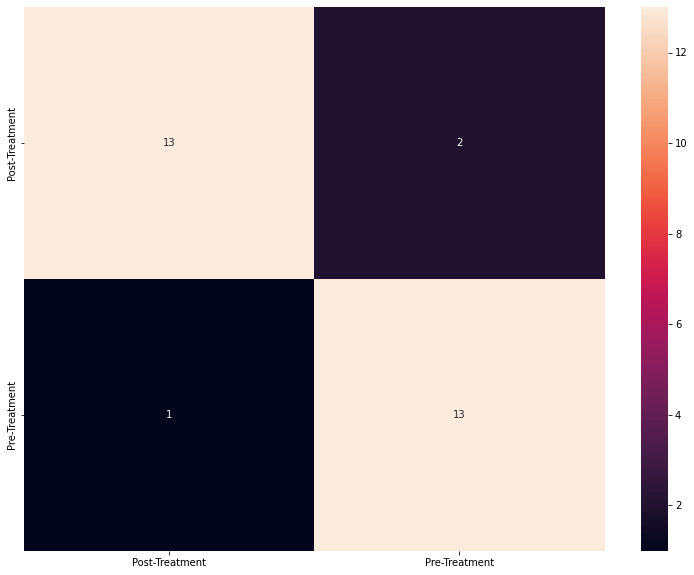

In [181]:
#And the obligatory confusion matrix.
conf = confusion_matrix(y_test,predictions)
new_conf = pd.DataFrame(conf, columns=classes, index=classes)

import matplotlib.pyplot as plt
import seaborn as sns

#plot heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(new_conf, annot=True);

Note the reduced false positive rate.

Possible Addition:

A Principle Component Analysis of the 36 post-treatment, based on the expression values for these genes of interest. If there is variation in gene expression among the recipients, it may be possible to correlate it to features found in their clinical data. However, additional information would be needed to gain useful information from that figure.

**Further Work**

The above analysis indicates that changes in gene expression associated with neurodegeneration can be reliably observed in RNA Seq data from chemotherapy recipients. What's more, it doesn't require thousands of probes.

Future work should focus on patents who have recieved chemotherapeutic drugs, and attempt to corelate the expression values of these genes with severity of symptoms. Doing so should make it possible to predict the symptoms of CICI before they become obvious, and tailor treatment accordingly.